# MovieLens Insight Explorer: Analyzing Trends, Ratings, and Genres

## Introduction
Let’s analyze the movielens data. I have some example questions to help perform exploratory data analysis. I will also add some visualizations and comments to further my analysis.

**Dataset:** movielens is a non-commercial, personalized movie recommendation service and provides movies, ratings and tags data publicly. We will download the data from [here](https://grouplens.org/datasets/movielens/) and take the up-to-date datasets from 'MovieLens 32M'.
This dataset describes 5-star rating and free-text tagging activity containing 32000204 ratings and 2000072 tag applications across 87585 movies. These data were created by 200948 users between 09.01.1995 and 12.10.2023. This dataset was generated on October 13, 2023.

To get started analysis via Python, we will need some packages below:

- pandas: It is a data analysis and manipulation library that provides data structures and tools.
- matplotlib.pyplot: It is a plotting library for creating visualizations in Python.
- seaborn: It provides a high-level interface for drawing attractive and informative statistical graphics.

## Questions
**1.** What are the top-rated genres over the years? Analyze movies by their genres and calculate the average rating for each genre year by year.

**2.** What is the distribution of total number of ratings among movies? Analyze the distribution of the total number of ratings per movie. 

**3.** Do movies with more number of tags have higher or lower average ratings? Analyze the relationship between the number of tags a movie receives and its average rating. 

**4.** Do more recent movies get higher ratings? Compare the ratings of older movies (pre-2000) with more recent ones (post-2000). Are newer movies rated higher, or is there a trend that older films are more cherished?

**5.** Do movies with more number of ratings have higher or lower average ratings? Analyze the relationship between the number of ratings a movie receives and its average rating. Do more popular movies tend to get higher ratings?

**6.** Are highly-rated movies more likely to belong to multiple genres? Analyze if movies that are categorized under multiple genres (e.g., Comedy-Drama) tend to receive higher ratings compared to single-genre films.


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read datasets (you need to provide the related file path where your files saved)
movies = pd.read_csv('./data/movies.csv')
ratings = pd.read_csv('./data/ratings.csv')
tags = pd.read_csv('./data/tags.csv')

In [3]:
# Glance at movies data
movies.sample(5)

,movieId,title,genres
47075,172685,Too Young to Die? (1990),Crime|Drama
30998,137118,The Ryan White Story (1989),Drama
35425,147070,Iron Man (1951),Drama
57203,194114,Freakshow (1989),Horror
41853,161718,Separate tables (1983),(no genres listed)


Before starting to answer questions we need a data manipulation process like extracting data or fixing data types.

### - Extract the year from the title
Since the title column contains title and year info we need to separate them to use them effectively.

In [4]:
# We can add a new column to store the original title column, before changing it
movies['title_original'] = movies['title']

# Function to extract the year and title
def extract_year(title):
    if title[-7:].startswith(' (') and title[-1] == ')':
        year = int(title[-5:-1])  # Extract the 4-digit year
        new_title = title[:-7]    # Remove the last 7 characters (the year and parentheses)
        return new_title, year
    return title, None  # If no valid year, return the original title and None for the year

# Apply the function and create two new columns 'title' and 'year'
movies[['title', 'year']] = movies['title_original'].apply(lambda x: pd.Series(extract_year(x)))

# Fill NaNs with 0 and change the data type to integer
movies['year'] = movies['year'].fillna(0).astype(int)

In [5]:
# Glance at new movies data
movies.sample(10)

,movieId,title,genres,title_original,year
69970,225315,Little Teo,Comedy,Little Teo (2013),2013
66894,216081,Taintlight,Comedy|Horror,Taintlight (2009),2009
21898,112670,Bullet Code,Western,Bullet Code (1940),1940
72938,236769,The Haunting of Seacliff Inn,Drama|Horror|Mystery,The Haunting of Seacliff Inn (1994),1994
22421,114762,Two Night Stand,Comedy|Romance,Two Night Stand (2014),2014
26520,126066,Broom-Stick Bunny,Animation|Children|Comedy,Broom-Stick Bunny (1956),1956
47062,172659,Reconversão,Documentary,Reconversão (2012),2012
63621,208187,The Monkey Folk,(no genres listed),The Monkey Folk (1989),1989
44373,167038,Dear Zindagi,Drama|Romance,Dear Zindagi (2016),2016
12548,60756,Step Brothers,Comedy,Step Brothers (2008),2008


### - Extract genres
Since the 'Genres' column can contain multiple genres, we need to change this for usability. We can copy the original dataset, drop unnecessary columns, split the genres and save it as a new DataFrame. Therefore, if applicable, we will have unique genre information for each movie in each row or multiple rows.

In [6]:
# Extract genres by using movies
movie_genre = movies.drop(columns= ['title', 'title_original', 'year'])
movie_genre['genres'] = movie_genre['genres'].str.split('|')
movie_genre = movie_genre.explode(column= 'genres')
movie_genre

,movieId,genres
0,1,Adventure
0,1,Animation
0,1,Children
0,1,Comedy
0,1,Fantasy
...,...,...
87582,292753,Drama
87583,292755,Drama
87584,292757,Action
87584,292757,Adventure


### - Convert timestamp to datetime
Since the format of date-time information of ratings is a timestamp we need to convert the epoch to a human-readable date.

In [7]:
# Glance at ratings data
ratings.sample(5)

,userId,movieId,rating,timestamp
8974706,56203,590,3.0,834669719
7724685,48403,151769,4.0,1536329085
31308176,196609,56152,3.5,1640648182
25838855,162296,1291,4.5,1465026512
28795339,180485,1465,4.0,1046411863


In [8]:
# Convert timestamp to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit= 's')

# Extract year info from date for the further analysis
ratings['year'] = ratings['timestamp'].dt.year

# Glance at new ratings data
ratings.sample(5)

,userId,movieId,rating,timestamp,year
31494564,197819,1093,4.0,2000-11-22 01:25:15,2000
18484074,115748,89759,3.0,2020-05-26 00:19:52,2020
25466095,159815,2359,4.0,2000-11-22 21:57:32,2000
22356003,139994,4148,3.5,2006-05-01 20:58:59,2006
30109020,188799,1562,3.5,2005-07-24 05:11:45,2005


### - Create new DataFrames
We will need two new generic DataFrames containing the average rating and the total number of ratings for each movie (one based on yearly) to answer analysis questions.

In [9]:
# Calculate average rating and the total number of ratings for each movie, save them into a new DataFrame as movie_rating_temp
movie_rating_temp = pd.DataFrame(ratings.groupby(['movieId',])['rating'].agg(['mean', 'count'])).reset_index().rename(columns={"mean": "avg_rating", "count": "total_ratings"})
movie_rating_temp['avg_rating'] = movie_rating_temp['avg_rating'].round(1)

# Merge movies and the calculated movie_rating_temp dataset
movie_rating = movies.merge(movie_rating_temp, how= 'left', on= 'movieId').drop(columns= ['genres', 'title_original', 'year'])

# Fiil NaNs with zero for total_ratings
movie_rating['total_ratings'].fillna(0, inplace= True)
movie_rating.sample(5)

,movieId,title,avg_rating,total_ratings
14309,74297,Electric Shadows (Meng ying tong nian),3.7,12.0
4200,4304,Startup.com,3.7,1087.0
65888,213722,The Adventures of Don Quixote,1.0,2.0
71321,229821,Lost to Shame,3.2,2.0
14070,72856,Moonrise,3.3,30.0


In [10]:
# Calculate average rating and the total number of ratings for each movie and rating year, save them into a new DataFrame as movie_rating_yearly
movie_rating_yearly_temp = pd.DataFrame(ratings.groupby(['movieId', 'year'])['rating'].agg(['mean', 'count'])).reset_index().rename(columns={"year": "rating_year", "mean": "avg_rating", "count": "total_ratings"})
movie_rating_yearly_temp['avg_rating'] = movie_rating_yearly_temp['avg_rating'].round(1)

# Merge movies and the calculated movie_rating_yearly_temp dataset
movie_rating_yearly = movies.merge(movie_rating_yearly_temp, how= 'left', on= 'movieId').drop(columns= ['genres', 'title_original', 'year'])

# Fiil NaNs with zero for total_ratings
movie_rating_yearly['total_ratings'].fillna(0, inplace= True)
movie_rating_yearly.sample(5)

,movieId,title,rating_year,avg_rating,total_ratings
209786,47978,SherryBaby,2017.0,3.4,13.0
249012,74851,From Paris with Love,2010.0,3.2,204.0
336469,133319,Resistance,2017.0,4.0,2.0
486636,279892,Africa: The Greatest Show On Earth,2023.0,4.5,2.0
435524,193241,Brokedown,2020.0,0.5,1.0


## Question 1 : Top-Rated Genres Over the Years
1. What are the top-rated genres over the years? Analyze movies by their genres and calculate the average rating for each genre year by year.

Firstly, we need to find 5 top-rated genres and then look at their trends over the years in a line graph.

In [11]:
# Merge movie_genre and movie_rating
top_5_genres_temp = movie_genre.merge(movie_rating, how= 'left', on= 'movieId')

# Find the 5 top-rated genres 
top_5_genres = pd.DataFrame(top_5_genres_temp.groupby('genres')['avg_rating'].mean()).reset_index().sort_values('avg_rating', ascending= False).head(5)
top_5_genres

,genres,avg_rating
7,Documentary,3.340031
10,Film-Noir,3.324000
12,IMAX,3.236923
13,Musical,3.193224
18,War,3.172899


In [12]:
# Merge movie_genre and movie_rating_yearly 
genre_rating_temp = movie_genre.merge(movie_rating_yearly, how= 'left', on= 'movieId')

# Calculate the average rating for each genre year by year
genre_rating = pd.DataFrame(genre_rating_temp.groupby(['genres', 'rating_year']).agg({'avg_rating' : 'mean', 'total_ratings' : 'sum'})).reset_index()
genre_rating['avg_rating'] = genre_rating['avg_rating'].round(1)

# Filter 5 top-rated genres
genre_rating_top_5 = genre_rating[genre_rating['genres'].isin(top_5_genres['genres'].tolist())]
genre_rating_top_5

,genres,rating_year,avg_rating,total_ratings
183,Documentary,1996.0,3.4,6923.0
184,Documentary,1997.0,3.1,4048.0
185,Documentary,1998.0,3.0,1877.0
186,Documentary,1999.0,3.3,12354.0
187,Documentary,2000.0,3.6,15929.0
...,...,...,...,...
519,War,2019.0,3.3,59382.0
520,War,2020.0,3.2,80097.0
521,War,2021.0,3.3,54013.0
522,War,2022.0,3.2,38228.0


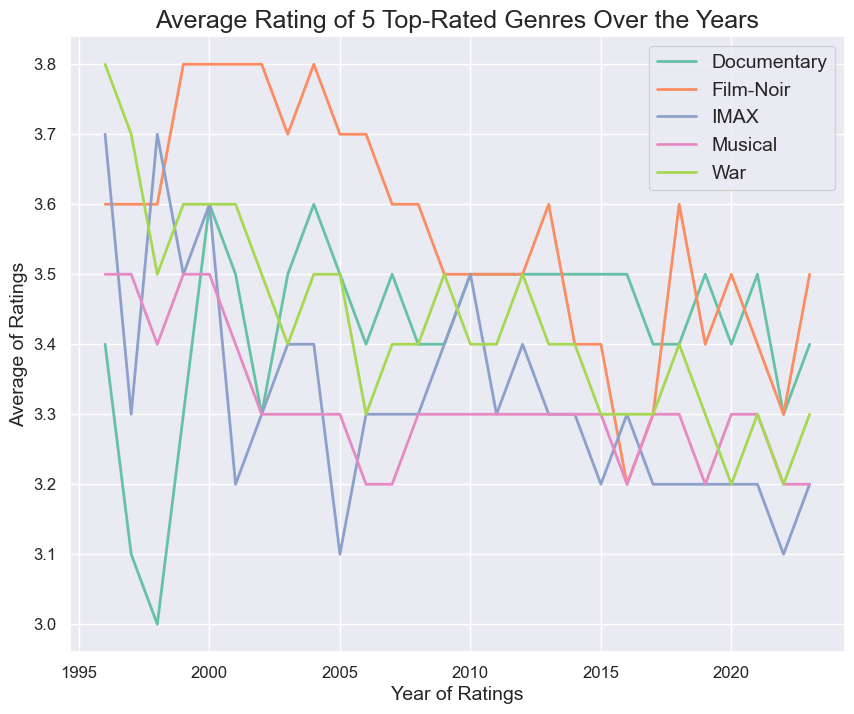

In [13]:
# Visualize the average ratings of 5 top-rated genres over the year

# Set the theme and size of the plot
sns.set_theme(style= 'darkgrid', palette= 'Set2')
plt.figure(figsize=(10,8))

# Create the plot, change the title and legend
sns.lineplot(data= genre_rating_top_5, x= 'rating_year', y= 'avg_rating', hue= 'genres', linewidth= 2)
plt.title('Average Rating of 5 Top-Rated Genres Over the Years', fontsize= 18)
plt.legend(fontsize= 14, loc= 'upper right')

# Change labels and their settings
plt.xlabel('Year of Ratings', fontsize= 14)
plt.ylabel('Average of Ratings', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

# Show the plot
plt.show();

***Answer 1:** The 5 top-rated genres are documentary, film-noir, IMAX, musical, and war over the years. When we look at the graph, there is no particular trend in increase or decrease for a genre. The average ratings fluctuate between 3.0 and 3.8.*

## Question 2: Distribution of Total Ratings Among Movies
2. What is the distribution of total number of ratings among movies? Analyze the distribution of the total number of ratings per movie.

We have `movie_rating` containing the total number of ratings per movie (`total_ratings`) to answer this question. Now, we need to visualize it. 

In [14]:
movie_rating.sample(5)

,movieId,title,avg_rating,total_ratings
86902,290127,The Quiet One,2.0,1.0
30736,136576,Green Street Hooligans: Underground,3.0,20.0
24651,121921,The Arnelo Affair,3.0,1.0
60051,200168,Övertidskrig,3.2,2.0
71244,229531,Return of the Ewok,1.5,1.0


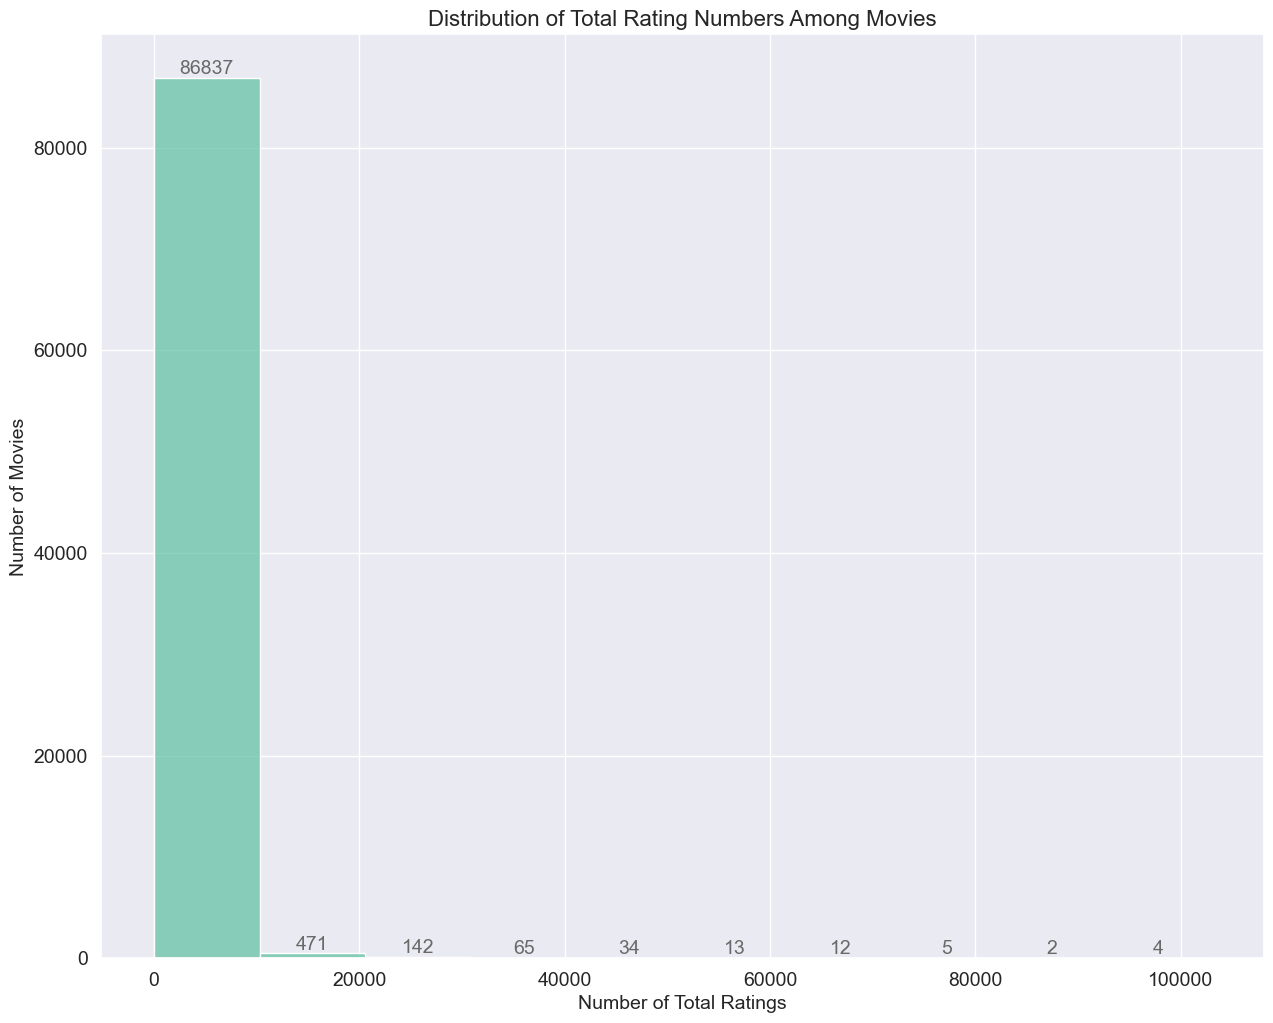

In [15]:
# Visualize a histogram

# Set the theme and size of the plot
sns.set_theme(style= 'darkgrid', palette= 'Set2')
plt.figure(figsize=(15,12))

# Create the plot, change the title and legend
ax = sns.histplot(data= movie_rating, x= 'total_ratings', bins= 10)
plt.title('Distribution of Total Rating Numbers Among Movies', fontsize= 16)

# Change labels and their settings
plt.xlabel('Number of Total Ratings', fontsize= 14)
plt.ylabel('Number of Movies', fontsize= 14)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)

# Annotate the total number of movies for the y-axis (for more readability)
ax.bar_label(ax.containers[0], fontsize= 14, color= 'dimgray')

# Show the plot
plt.show();

In [16]:
# What are the films with more than 80.000 ratings?
movie_rating[movie_rating['total_ratings'] > 80000]

,movieId,title,avg_rating,total_ratings
257,260,Star Wars: Episode IV - A New Hope,4.1,85010.0
292,296,Pulp Fiction,4.2,98409.0
314,318,"Shawshank Redemption, The",4.4,102929.0
351,356,Forrest Gump,4.1,100296.0
585,593,"Silence of the Lambs, The",4.1,90330.0
2480,2571,"Matrix, The",4.2,93808.0


***Answer 2:** As expected, fewer movies are getting a higher number of ratings. For example; only six movies got more than 80.000 ratings.*

## Question 3: The relationship between the number of tags and the average rating
3. Do movies with more number of tags have higher or lower average ratings? Analyze the relationship between the number of tags a movie receives and its average rating.

To answer this question, we need to merge `tags` and `movie_rating`. Then we will set `bins` of average ratings and visualize the number of tags by average rating ranges.

In [17]:
# Calculate the total number of tags for each movie
tags_temp = pd.DataFrame(tags.groupby('movieId')['tag'].count()).reset_index().rename(columns= {'tag': 'total_tags'})

# Merge movie_rating and the calculated tags dataset
movie_tag = movie_rating.merge(tags_temp, how= 'outer', on= 'movieId')

# Fill NaNs with zero for total_tags
movie_tag['total_tags'].fillna(0, inplace= True)
movie_tag

,movieId,title,avg_rating,total_ratings,total_tags
0,1,Toy Story,3.9,68997.0,1230.0
1,2,Jumanji,3.3,28904.0,573.0
2,3,Grumpier Old Men,3.1,13134.0,23.0
3,4,Waiting to Exhale,2.8,2806.0,12.0
4,5,Father of the Bride Part II,3.1,13154.0,64.0
...,...,...,...,...,...
87580,292731,The Monroy Affaire,4.0,1.0,0.0
87581,292737,Shelter in Solitude,1.5,1.0,0.0
87582,292753,Orca,4.0,1.0,0.0
87583,292755,The Angry Breed,1.0,1.0,0.0


In [18]:
# Define the bins for avg_rating
bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
labels = ['0-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0', 
          '3.0-3.5', '3.5-4.0', '4.0-4.5', '4.5-5.0']

# Bin the avg_rating into categories
movie_tag['rating_bins'] = pd.cut(movie_tag['avg_rating'], bins=bins, labels=labels, include_lowest= False)

# Crosscheck bins
# movie_tag.groupby('rating_bins')['avg_rating'].unique()

# Calculate the total number of tags by rating bins
movie_tag_bins = pd.DataFrame(movie_tag.groupby('rating_bins', observed= True)['total_tags'].sum()).reset_index()
movie_tag_bins

,rating_bins,total_tags
0,0-0.5,2147.0
1,0.5-1.0,2271.0
2,1.0-1.5,5392.0
3,1.5-2.0,21693.0
4,2.0-2.5,78743.0
5,2.5-3.0,253284.0
6,3.0-3.5,575817.0
7,3.5-4.0,854569.0
8,4.0-4.5,187508.0
9,4.5-5.0,1350.0


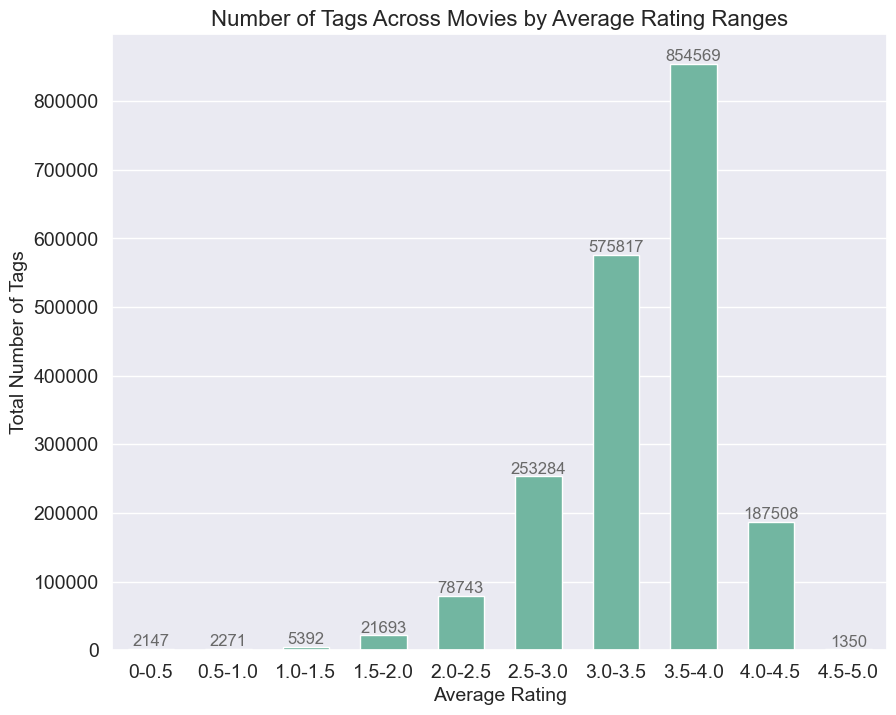

In [19]:
# Visualize a bar plot

# Set the theme and size of plot
sns.set_theme(style= 'darkgrid', palette= 'Set2')
plt.figure(figsize=(10,8))

# Create the plot, change the title
ax = sns.barplot(data= movie_tag_bins, x= 'rating_bins', y= 'total_tags', width= 0.6, errorbar= None)
plt.title('Number of Tags Across Movies by Average Rating Ranges', fontsize= 16)

# Change labels and their settings
plt.xlabel('Average Rating', fontsize= 14)
plt.ylabel('Total Number of Tags', fontsize= 14)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)

# Annotate the total number of tags for the y-axis (for more readability)
ax.bar_label(ax.containers[0], fontsize= 12, color= 'dimgray')

# Show the plot
plt.show();

***Answer 3:** Most users shared their words for the movies with rating between 3.0 and 4.0. Surprisingly, the best and worst movies were tagged less.*

## Question 4: Do more recent movies get higher ratings?
4. Do more recent movies get higher ratings? Compare the ratings of older movies (pre-2000) with more recent ones (post-2000). Are newer movies rated higher, or is there a trend that older films are more cherished?

By combining the two datasets, we can add average rating information to the `movies`. Then, we can show the trend in a line chart.
Since there are some missing values ​​in the year column of the movies, we can ignore them and keep only the movies for which we know the year of recording.

In [20]:
# Merge movies and movie_rating
movies_with_rating = movies.merge(movie_rating, how= 'left', on= 'movieId').drop(columns= ['genres', 'title_original', 'title_x', 'title_y']).rename(columns= {'year': 'movie_year'})
movies_with_rating

,movieId,movie_year,avg_rating,total_ratings
0,1,1995,3.9,68997.0
1,2,1995,3.3,28904.0
2,3,1995,3.1,13134.0
3,4,1995,2.8,2806.0
4,5,1995,3.1,13154.0
...,...,...,...,...
87580,292731,2022,4.0,1.0
87581,292737,2023,1.5,1.0
87582,292753,2023,4.0,1.0
87583,292755,1968,1.0,1.0


In [21]:
# Filter missing value for movie year (keep only not 0)
movies_with_rating_filtered = movies_with_rating[movies_with_rating['movie_year'] != 0]

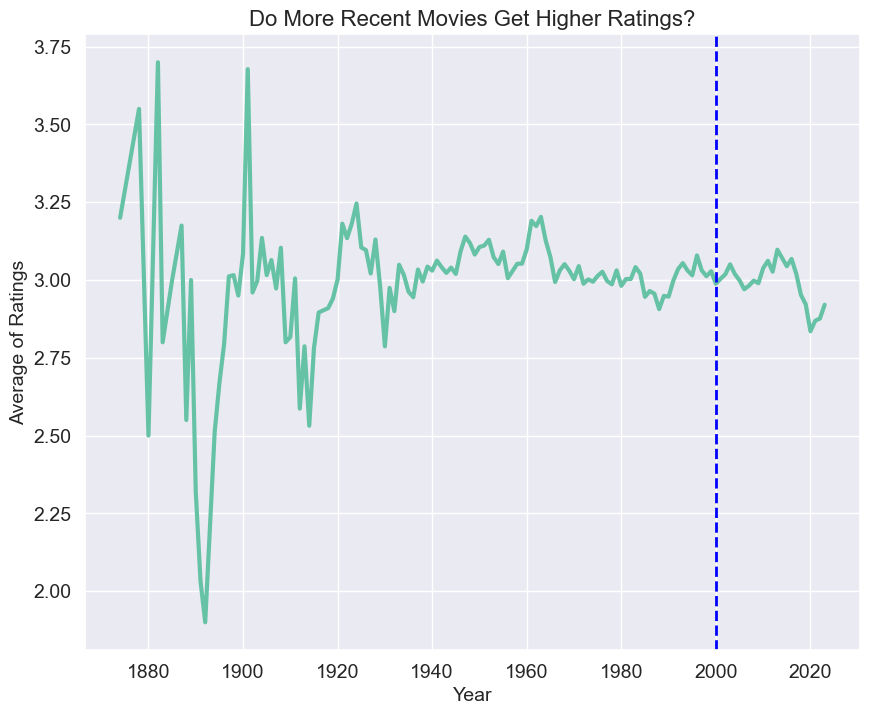

In [22]:
# Visualize a line plot

# Set the theme and size of the plot
sns.set_theme(style= 'darkgrid', palette= 'Set2')
plt.figure(figsize=(10,8))

# Create the plot, change the title
sns.lineplot(data= movies_with_rating_filtered, x= 'movie_year', y= 'avg_rating', linewidth= 3, errorbar= None)
plt.title('Do More Recent Movies Get Higher Ratings?', fontsize= 16)

# Change labels and their settings
plt.xlabel('Year', fontsize= 14)
plt.ylabel('Average of Ratings', fontsize= 14)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)

# Add a solid vertical reference line at the year 2000
plt.axvline(x=2000, color='blue', linestyle='--', linewidth=2)  # You can change the style and color

# Show the plot
plt.show();

***Answer 4:** When we compare the ratings of older movies (pre-2000) with more recent ones (post-2000), we can't say there is a clear trend. It seems that newer and older movies have the similar average ratings. However, we can say that there is a remarkable decrease around 2020 because of effects of the pandemic.*

## Question 5: Do Movies With More Ratings Have Higher or Lower Average Ratings?
5. Do movies with more number of ratings have higher or lower average ratings? Analyze the relationship between the number of ratings a movie receives and its average rating. Do more popular movies tend to get higher ratings?

We can analyse `movies_with_rating` to understand whether people tend to share their opinions (`total_ratings`) more about movies they like or movies they don't like (`avg_rating`).

In [23]:
# Look at the top 10 movies with the highest number of ratings (total_ratings)
movies_with_rating.sort_values('total_ratings', ascending= False).head(10)

,movieId,movie_year,avg_rating,total_ratings
314,318,1994,4.4,102929.0
351,356,1994,4.1,100296.0
292,296,1994,4.2,98409.0
2480,2571,1999,4.2,93808.0
585,593,1991,4.1,90330.0
257,260,1977,4.1,85010.0
2867,2959,1999,4.2,77332.0
475,480,1993,3.7,75233.0
522,527,1993,4.2,73849.0
4888,4993,2001,4.1,73122.0


In [24]:
# Look at the top 10 movies with the highest average ratings (avg_rating)
movies_with_rating.sort_values('avg_rating', ascending= False).head(10)

,movieId,movie_year,avg_rating,total_ratings
56534,192711,2008,5.0,1.0
69568,224104,2013,5.0,1.0
69677,224445,2016,5.0,1.0
83132,278764,2012,5.0,1.0
69673,224433,2020,5.0,1.0
69666,224403,2020,5.0,1.0
31984,139393,1969,5.0,1.0
32010,139453,2011,5.0,1.0
69629,224274,2018,5.0,1.0
32019,139473,2012,5.0,1.0


In [25]:
# Bin the avg_rating into categories
movies_with_rating['rating_bins'] = pd.cut(movies_with_rating['avg_rating'], bins=bins, labels=labels, include_lowest= False)

# Calculate the total number of ratings by rating bins
movie_rating_bins = pd.DataFrame(movies_with_rating.groupby('rating_bins', observed= True)['total_ratings'].sum()).reset_index()
movie_rating_bins

,rating_bins,total_ratings
0,0-0.5,1437.0
1,0.5-1.0,3326.0
2,1.0-1.5,18227.0
3,1.5-2.0,151142.0
4,2.0-2.5,814173.0
5,2.5-3.0,3576243.0
6,3.0-3.5,9770573.0
7,3.5-4.0,14102442.0
8,4.0-4.5,3560815.0
9,4.5-5.0,1826.0


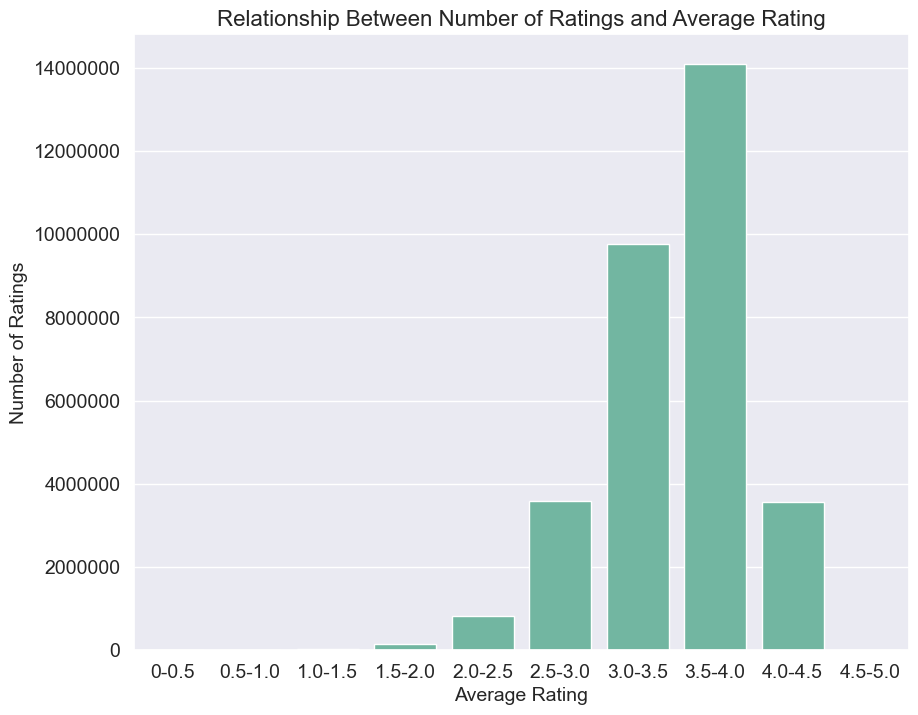

In [26]:
# Visualize the relationship between the number of ratings and average ratings

# Set the theme and size of the plot
sns.set_theme(style= 'darkgrid', palette= 'Set2')
plt.figure(figsize=(10,8))

# Create the plot, change the title
ax = sns.barplot(data= movie_rating_bins, x= 'rating_bins', y= 'total_ratings', errorbar=None)
plt.title('Relationship Between Number of Ratings and Average Rating', fontsize= 16)

# Change labels and their settings
plt.xlabel('Average Rating', fontsize= 14)
plt.ylabel('Number of Ratings', fontsize= 14)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)

# Show numbers in plain format instead of scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show();

Since the difference between some `total_ratings` is too high, it is hard to see all values in the graph. To avoid this, we can set the y-axis to a logarithmic scale, which will allow both very small and very large values to be visible in the same graph.\
Then we can change the code like below:

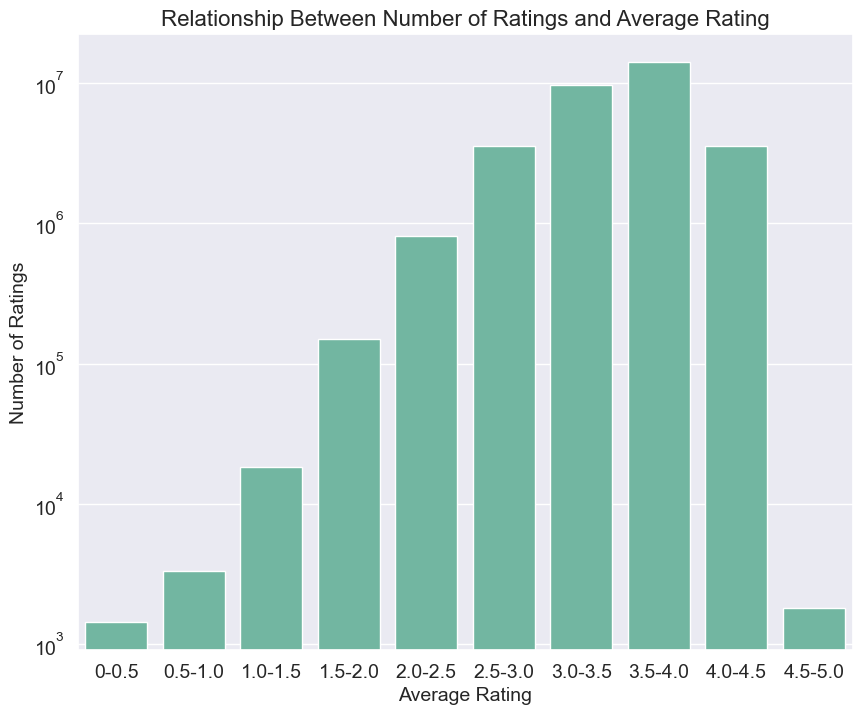

In [27]:
# Visualize the relationship between the number of ratings and average ratings

# Set the theme and size of the plot
sns.set_theme(style= 'darkgrid', palette= 'Set2')
plt.figure(figsize=(10,8))

# Create the plot, change the title
ax = sns.barplot(data= movie_rating_bins, x= 'rating_bins', y= 'total_ratings', errorbar=None)
plt.title('Relationship Between Number of Ratings and Average Rating', fontsize= 16)

# Change labels and their settings
plt.xlabel('Average Rating', fontsize= 14)
plt.ylabel('Number of Ratings', fontsize= 14)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)

# Show numbers in plain format instead of scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Show too small and big values by log
plt.yscale('log')

# Show the plot
plt.show();

***Answer 5:** Similar to the answer 3, the best and worst movies were rated less. Most users gave ratings for movies between 3.0 and 4.0.*

## Question 6: Are Highly Rated Movies More Likely to Belong to Multiple Genres?
6. Are highly-rated movies more likely to belong to multiple genres? Analyze if movies that are categorized under multiple genres (e.g., Drama-Romance) tend to receive higher ratings compared to single-genre films.

Some movies have only one genre but also some with more than one genre. To distinguish two types of movies, we can add a new column and set them as single-genres or multiple-genres.
Since for the multiple genres movies, the separator is '|' we can identify multiple ones by controlling this symbol. For this question, we can ignore movies that have no genreslisted and keep only the movies with at least one genre.

In [28]:
# Create a function to determine whether it is a single-genre movie or a multiple-genre movie
def is_multiple_genres(genres):
    if '|' in genres:
        return "multiple"
    else:
        return "single"

# Apply the function and create a new columns 'is_multiple_genres'
movies['is_multiple_genres'] = movies['genres'].apply(lambda x: pd.Series(is_multiple_genres(x)))
movies.sample(5)

,movieId,title,genres,title_original,year,is_multiple_genres
14106,73010,You Are So Beautiful (Je vous trouve très beau),Comedy|Romance,You Are So Beautiful (Je vous trouve très beau...,2005,multiple
86220,287859,Paradise Island,Action|Adventure|Romance,Paradise Island (1930),1930,multiple
78258,261475,Rhino,Crime|Drama,Rhino (2021),2021,multiple
63099,207001,La mitad del cielo,Drama,La mitad del cielo (1986),1986,single
21365,110130,"Nut Job, The",Adventure|Animation|Children|Comedy,"Nut Job, The (2014)",2014,multiple


In [29]:
# Drop movies have no genres listed
single_multiple_genres = movies[movies['genres'] != '(no genres listed)']

# Merge single_multiple_genres and movie_rating
single_multiple_genres = single_multiple_genres.merge(movie_rating, how= 'left', on= 'movieId').drop(columns= ['genres', 'title_original', 'year', 'title_y'])

# Calculate the average rating for single-genres movies and multiple-genres movies
is_multiple_genres = pd.DataFrame(single_multiple_genres.groupby('is_multiple_genres')['avg_rating'].mean().round(2))
is_multiple_genres

,avg_rating
is_multiple_genres,
multiple,2.97
single,3.05


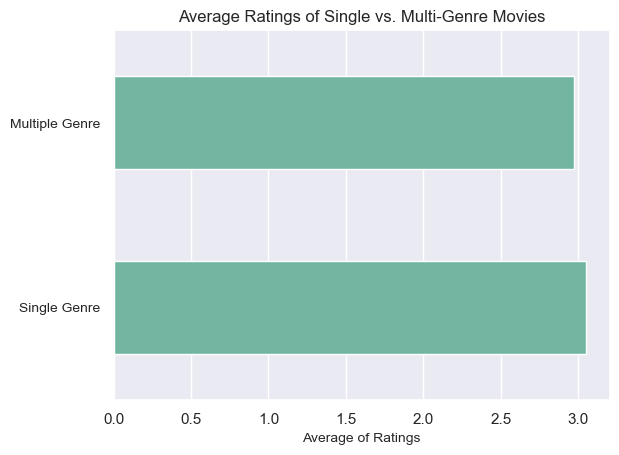

In [30]:
# Visualize 'is_multiple_genres' to show that there is almost no difference

# Create the plot, change the title
sns.barplot(data= is_multiple_genres, x= 'avg_rating', y= 'is_multiple_genres', width= 0.5)
plt.title('Average Ratings of Single vs. Multi-Genre Movies', fontsize= 12)

# Change labels and their settings
plt.xlabel('Average of Ratings', fontsize= 10)
plt.ylabel('')
plt.yticks(['multiple', 'single'], ['Multiple Genre', 'Single Genre'], fontsize= 10)

# Show the plot
plt.show();

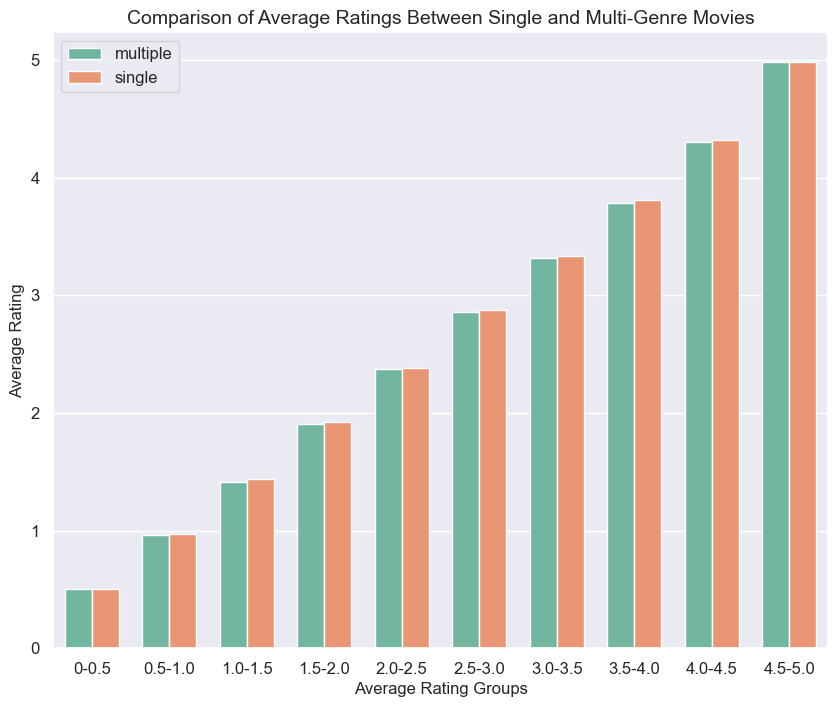

In [31]:
# Bin the avg_rating into categories
single_multiple_genres['rating_bins'] = pd.cut(single_multiple_genres['avg_rating'], bins=bins, labels=labels, include_lowest= False)

# Visualize 'is_multiple_genres' to show that there is almost no difference

# Set the theme and size of the plot
sns.set_theme(style= 'darkgrid', palette= 'Set2')
plt.figure(figsize=(10,8))

# Create the plot, change the title and legend
sns.barplot(data= single_multiple_genres, x= 'rating_bins', y= 'avg_rating', hue= 'is_multiple_genres', width= 0.7, errorbar= None)
plt.title('Comparison of Average Ratings Between Single and Multi-Genre Movies', fontsize= 14)
plt.legend(fontsize= 12, loc= 'upper left')

# Change labels and their settings
plt.xlabel('Average Rating Groups', fontsize= 12)
plt.ylabel('Average Rating', fontsize= 12)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

# Show the plot
plt.show();

***Answer 6:** When we look at the average rating groups, in each group there is no difference between average ratings of single and multiple genres. Therefore, we can say that there is no correlation between the average rating of a movie and its genres (whether single or multiple).*